In [1]:
from sklearn import preprocessing
import unittest
import numpy as np

class process:
    """
    Class preprocessing constructor
    @param data type .data
    """
    def __init__(self):
        self.features = np.loadtxt("public_data/crime_train.data")
        self.year,self.month,self.day,self.day_num,self.minute,self.hour,self.X,self.Y,self.PdDistrict,self.address,self.resolution=np.loadtxt("public_data/crime_train.data", unpack=True)
        self.labels = np.loadtxt("public_data/crime_train.solution")
        self.drug,self.larceny,self.missing_person,self.prostitution,self.vehicule_theft,self.warrants=np.loadtxt("public_data/crime_train.solution", unpack=True)
        self.outliers()

    
    
	

    def outliers(self):
        self.starKiller(self.resolution, 3, True)
        self.starKiller(self.X, 1, True)
        self.starKiller(self.Y, 1, True)
	self.one_column()
       # self.resolution=preprocessing.RobustScaler(self.resolution)
       # self.X=preprocessing.RobustScaler(self.X)
       # self.Y=preprocessing.RobustScaler(self.Y)
    

    def getYear(self):
        return self.year

    def getFeatures(self):
        return self.features

    def getLabels(self):
        return self.labels
    
    def getMonth(self):
        return self.month
    
    def getDay(self):
        return self.day
    
    def getDayNum(self):
        return self.day_num
    
    def getMinute(self):
        return self.minute
    
    def getHour(self):
        return self.hour
    
    def getX(self):
        return self.X
    
    def getY(self):
        return self.Y
    
    def getPdDistrict(self):
        return self.PdDistrict
    
    def getAddress(self):
        return self.address
    
    def getResolution(self):
        return self.resolution

    def getDrug(self):
        return self.drug
    
    def getLarceny(self):
        return self.larceny
    
    def getMissingPerson(self):
        return self.missing_person
    
    def getProstitution(self):
        return self.prostitution
    
    def getVehiculeTheft(self):
        return self.vehicule_theft
    
    def getWarrants(self):
        return self.warrants

    def starKiller(self, variable_name, killer, star):
         a=list()
         if star==True:
             for data in variable_name:
                 if data<killer:
                     a.append(data)
             variable_name=a
         else:
           for data in variable_name:
              if data>killer:
                 a.append(data)
           variable_name=a

    def one_column(self):
        b=self.labels[:,0]*0
        for i in range(1, 6):
            b+=self.labels[:,i]*i
            
        
        self.labels=b
a=process()
print a.getMonth()
print a.getDay()
print a.getX()
print a.getY()
print a.getResolution()
print a.getLabels()


[ 12.   5.   6. ...,   4.   5.  12.]
[ 30.  31.  11. ...,  18.  17.  12.]
[-0.8001427  -1.30122755  0.23401387 ...,  0.61906741  0.38466701
 -1.75380525]
[ 0.01699322  0.00511855  0.01201698 ...,  0.00317994 -0.00594304
 -0.09172559]
[ 0.  1.  0. ...,  1.  7.  1.]
[ 1.  4.  0. ...,  1.  1.  1.]


In [2]:
codedir = 'sample_code/' 
from sys import path; path.append(codedir)
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import data_io

In [3]:
import classifier

In [4]:
#Here are the imports for the graphical part
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from imp import reload
from sklearn import datasets
from sklearn import linear_model
import os
import seaborn as sns;sns.set()
from scipy.misc import imread

In [5]:
dataname = 'crime'
datadir = 'public_data/'
basename = datadir  + dataname
reload(data_io)
data = data_io.read_as_df(basename)
categories = data.groupby('target')

Reading public_data/crime_train from AutoML format
Number of examples = 60916
Number of features = 11
Number of classes = 6


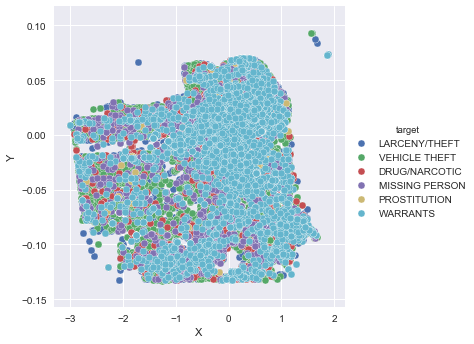

In [6]:
def create_map(): #Draw the inial map of crime
        CX=data[(data.X<30) & (data.Y<30)]
        sns.pairplot(CX, hue="target",x_vars='X',y_vars='Y',size=5)
        
create_map()


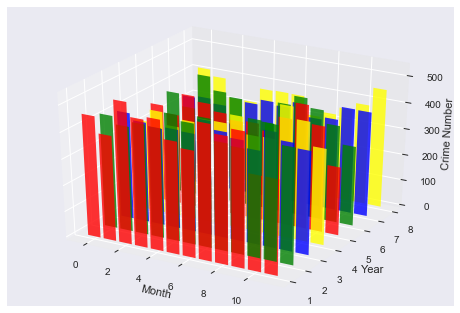

In [7]:
 def hist_3D():#Print a 3D barchart representing the number of crimes per month each years
        fig=plt.figure()
        ax=fig.add_subplot(111,projection='3d') # Create an empty 3D figure
        for c,y in zip(['red','green','blue','yellow','red','green','blue','yellow'],[1,2,3,4,5,6,7,8,9,10,11,12]):
            xs=np.arange(12) # Number of columns of each histograms
            CYear=data[(data.Year==y)]
            months = CYear.groupby('Month')
            month = []
            num_months = []
            for gr in months.groups:
                month.append(gr)
                num_months.append(len(months.get_group(gr)))
            ys=num_months # Create one histogram per year
            cs=[c]*len(xs) # Set the colors of the histograms
            ax.bar(xs, ys, zs=y, zdir='y', color=cs, alpha=0.8)
        
        ax.set_xlabel('Month')
        ax.set_ylabel('Year')
        ax.set_zlabel('Crime Number')
        plt.show()
hist_3D() 

In [8]:
#Here are the different imports for the cross validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts

#Here are our different SKLEARN Classifiers imports:

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neural_network import MLPClassifier
# NOT WORKING from sklearn.gaussian_process import GaussianProcessClassifier

def histocomparaison(valeurs,categories): #Method to create barchart
    plt.bar(range(len(valeurs)), valeurs,align="center",alpha=.5)
    plt.xticks(range(len(valeurs)), categories,rotation=90,fontsize=10)
    plt.show()

def  best_fit(names, classifiers, x, y):
    score_boucle_train = []
    final_array = []
    best=["",0]

    for name, clf in zip(names, classifiers):
        score_boucle_train.append( cross_val_score(clf, x, y, cv=10, n_jobs=1 ))

    final_array=np.mean(score_boucle_train, axis=1, dtype=np.float64) 
    histocomparaison(final_array,names)
    for score, name in zip(final_array, names):
        
        if score>best[1] :
            best[1]=score
            best[0]=name
    return best


In [9]:
#We want to cycle on the different classifier
#We create one array with the classifiers methods
#and one array with the classifier name

names = ["RandomForest", "KNeighbors", "DecisionTree", "GaussianNB", 
         "AdaBoostClassifier"]
         
classifiers = [ RandomForestClassifier(), 
                KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                GaussianNB(),
                AdaBoostClassifier()
                ]

In [10]:
A=process()
x = A.getFeatures()
y = A.getLabels()
print x
print y

[[  4.  12.  30. ...,   1.   0.   0.]
 [  5.   5.  31. ...,   4.   0.   1.]
 [ 11.   6.  11. ...,   6.   1.   0.]
 ..., 
 [  4.   4.  18. ...,   8.   0.   1.]
 [  0.   5.  17. ...,   8.   0.   7.]
 [  9.  12.  12. ...,   7.   0.   1.]]
[ 1.  4.  0. ...,  1.  1.  1.]


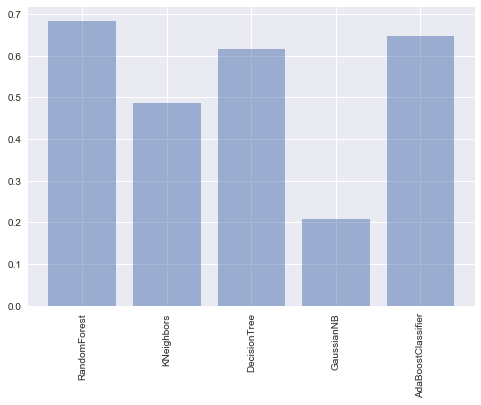

['RandomForest', 0.68372846675688514]

In [11]:
best_fit(names, classifiers, x, y)


In [12]:
def comparaisonjoursemaine(prediction,reference,nom):#Method that display a barchart of errors from a classifier by day of week
       joursemaine=a.getDayNum()
       erreur=[0,0,0,0,0,0,0]
       dayweek=["0","1","2","3","4","5","6"]
       titre="Numbers of error by Day of the week " + nom
       i=0
       while i<len(prediction):
          if prediction[i]!=reference[i]:
            day=int(joursemaine[i])
            erreur[day]=erreur[day]+1
          i=i+1
       plt.title(titre)
       histocomparaison(erreur,dayweek)
def comparaisonmois(prediction,reference,nom):#Method that display a barchart of errors from a classifier by month
    donnemois=a.getMonth()
    erreur=[0,0,0,0,0,0,0,0,0,0,0,0]
    numbermonth=["1","2","3","4","5","6","7","8","9","10","11","12"]
    titre="Numbers of error by Months for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       mois=int(donnemois[i])
       erreur[mois-1]=erreur[mois-1]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,numbermonth)
def comparaisonjourmois(prediction,reference,nom): #Method that display a barchart of errors from a classifier by day
    donnejourmois=a.getDay()
    erreur=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    numberdaymonth=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
    titre="Numbers of error by Days for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       mois=int(donnejourmois[i])
       erreur[mois-1]=erreur[mois-1]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,numberdaymonth)
def comparaisonannee(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    numannee=a.getYear()
    erreur=[0,0,0,0,0,0,0,0,0,0,0,0,0]
    numberyear=["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012"]
    titre="Numbers of error by Years for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       annee=int(numannee[i])
       erreur[annee]=erreur[annee]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,numberyear)
def comparaisonminute(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    minute=a.getMinute()
    erreur=[0,0,0,0]
    numberyear=["0-15","16-30","31-45","46-59"]
    titre="Numbers of error by Minutes for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       miinute=int(minute[i])
       if miinute<16:
        erreur[0]=erreur[0]+1
       if miinute>15 and miinute<31:
        erreur[1]=erreur[1]+1
       if miinute>30 and miinute<46:
        erreur[2]=erreur[2]+1 
       if miinute>45 and miinute<60:
        erreur[3]=erreur[3]+1 
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,numberyear)
def comparaisonheure(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    numhours=a.getHour()
    erreur=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    hour=["0h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h"]
    titre="Numbers of error by Hours for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       heure=int(numhours[i])
       erreur[heure]=erreur[heure]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,hour)
def comparaisondistrict(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    num=a.getPdDistrict()
    erreur=[0,0,0,0,0,0,0,0,0,0]
    names=["District 0","District 1","District  2","District 3","District  4","District 5","District  6","District  7","District 8","District 9"]
    titre="Numbers of error by District for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       factor=int(num[i])
       erreur[factor]=erreur[factor]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,names)
def comparaisonresolution(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    num=a.getResolution()
    erreur=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    names=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]
    titre="Numbers of error by Resolution for " + nom
    i=0
    while i<len(prediction):
      if prediction[i]!=reference[i]:
       factor=int(num[i])
       erreur[factor]=erreur[factor]+1
      i=i+1
    plt.title(titre)
    histocomparaison(erreur,names)
def comparaisonlabel(prediction,reference,nom): #Method that display a barchart of errors from a classifier by years
    num=a.getLabels()
    erreur=[0,0,0,0,0,0]
    numberof=[0,0,0,0,0,0]
    percenta=[0,0,0,0,0,0]
    names=["DRUG/NARCOTIC","LARCENY/THEFT","MISSING PERSON","PROSTITUTION","VEHICLE THEFT","WARRANTS"]
    titre="Percentage of errors by Labels for " + nom
    i=0
    while i<len(prediction):
         factor=int(num[i])
         numberof[factor]=numberof[factor]+1
         if prediction[i]!=reference[i]:
           erreur[factor]=erreur[factor]+1
         i=i+1
    j=0
    while j<len(numberof):
          print names[j]
          percenta[j]=((erreur[j]+0.)/(numberof[j]))*100
          chiffre=str(percenta[j])+ "%"
          print chiffre
          j=j+1
    plt.title(titre)
    histocomparaison(percenta,names)
def errorbar(prediction,name): #display all the bar chart for one classifier 
    comparaisonannee(prediction,a.getLabels(),name)
    comparaisonjourmois(prediction,a.getLabels(),name)
    comparaisonmois(prediction,a.getLabels(),name)
    comparaisonjoursemaine(prediction,a.getLabels(),name)
    comparaisonminute(prediction,a.getLabels(),name)
    comparaisonheure(prediction,a.getLabels(),name)
    comparaisondistrict(prediction,a.getLabels(),name)
    comparaisonresolution(prediction,a.getLabels(),name)
    comparaisonlabel(prediction,a.getLabels(),name)


[ 1.  1.  0. ...,  1.  1.  1.]


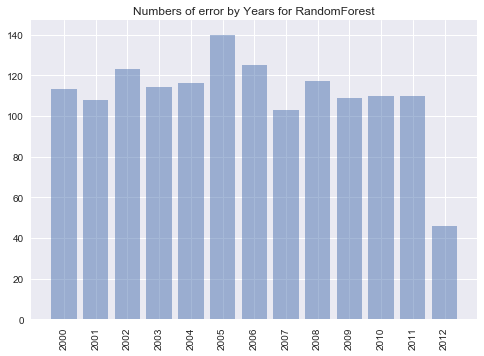

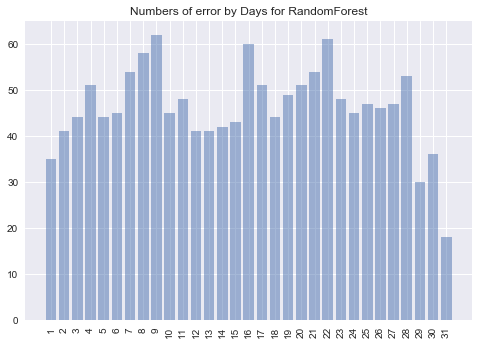

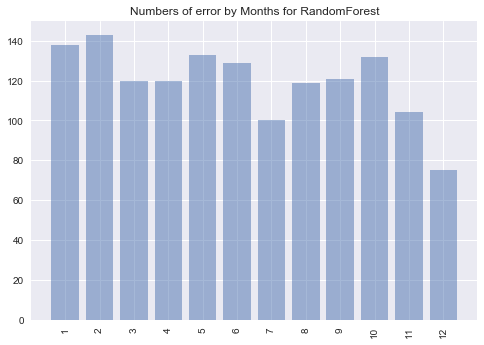

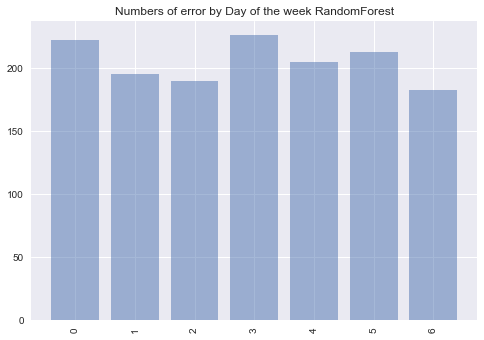

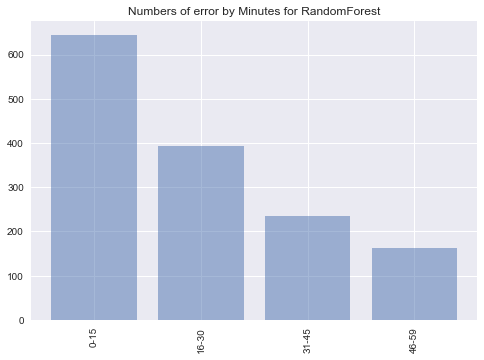

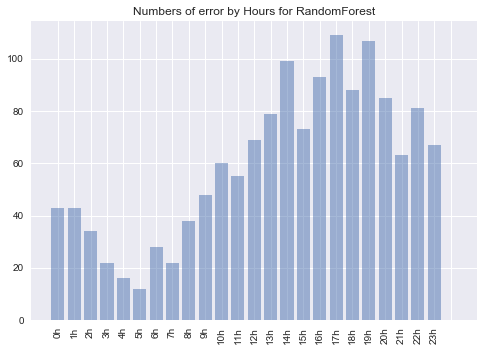

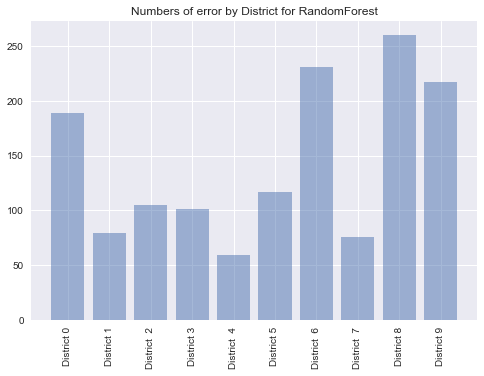

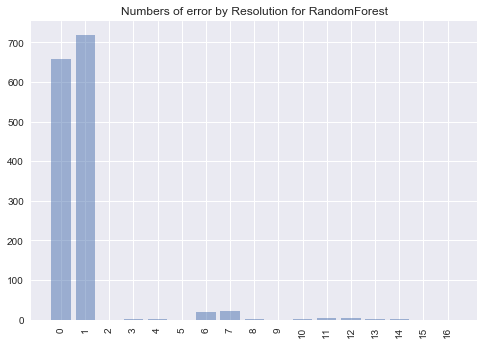

DRUG/NARCOTIC
2.50108742932%
LARCENY/THEFT
0.437985943707%
MISSING PERSON
2.99086757991%
PROSTITUTION
1.78306092125%
VEHICLE THEFT
5.38295577131%
WARRANTS
5.79012515472%


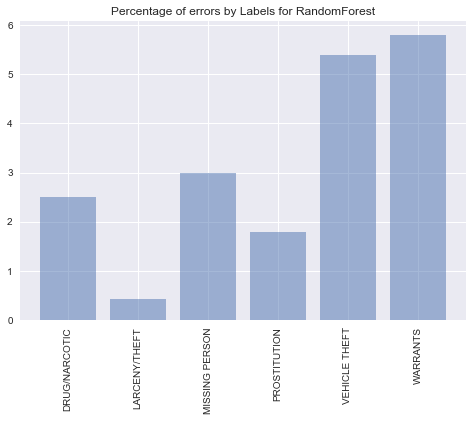

In [13]:
clf = RandomForestClassifier()
clf.fit(x,y)
clf.score(x,y)
print clf.predict(x)
z=clf.predict(x)
errorbar(z,"RandomForest")


In [14]:
result_dir = 'res/'
outname = result_dir + dataname
X_valid = np.loadtxt("public_data/crime_valid.data")
X_test = np.loadtxt("public_data/crime_test.data")

Y_valid = clf.predict_proba(X_valid)
Y_test = clf.predict_proba(X_test)

data_io.write(outname + '_valid.predict', Y_valid)
data_io.write(outname + '_test.predict', Y_test)
!ls $outname*

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [15]:
outdir = '../outputs'
datadir = 'public_data/' 
!python run.py ../public_data ../outputs

Using input_dir: ../public_data
Using output_dir: C:\Users\Henri\Downloads\Main_code_project_clean (6)\Main_code_project_clean\outputs
========= Zipping this directory to prepare for submit ==============
resultonly
sauter public_data
See: ../sample_submission_17-03-31-01-24.zip
[+] Done
[+] Overall time spent  4.78 sec ::  Overall time budget  0.00 sec
